# Spotify Data Exploration
## by Xiaokai Qi

> I work in the music industry, hence I am always curious to explore the features that would make a song popular. I found these two dataset on kaggle and decided to explore them to figure out what are some of the common features shareed among hit songs.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests


%matplotlib inline

> There are two datasets used here. The first data set focuses on the features of 160k+ tracks released throughtout the last century. The second data set only zooms in on the releases from the 2000s, but with categorical data of the songs' genres.

First data set: https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks
Second data set: https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset

In [2]:
# import first dataset
df = pd.read_csv('data.csv')
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [3]:
#import second dataset
df_genre = pd.read_csv('Spotify-2000.csv')
df_genre.head()

,Index,Title,Artist,Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
#get an idea of what the datasets include
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Index                   1994 non-null   int64 
 1   Title                   1994 non-null   object
 2   Artist                  1994 non-null   object
 3   Genre                   1994 non-null   object
 4   Year                    1994 non-null   int64 
 5   Beats Per Minute (BPM)  1994 non-null   int64 
 6   Energy                  1994 non-null   int64 
 7   Danceability            1994 non-null   int64 
 8   Loudness (dB)           1994 non-null   int64 
 9   Liveness                1994 non-null   int64 
 10  Valence                 1994 non-null   int64 
 11  Length (Duration)       1994 non-null   object
 12  Acousticness            1994 non-null   int64 
 13  Speechiness             1994 non-null   int64 
 14  Popularity              1994 non-null   int64 
dtypes: i

### What is the structure of your dataset?

> The first dataset has release's title, artists, release date, popularity score and music features such as danceaibility and energy. The second dataset shares a lot of some features but in different format (int as opposed to float), but most important difference is that the second one lists the releases' top genres and all releases here are only from the 2000s.

### What is/are the main feature(s) of interest in your dataset?

> To discover what makes a song popular

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The songs' streaming numbers on Spotify.

## Univariate Exploration


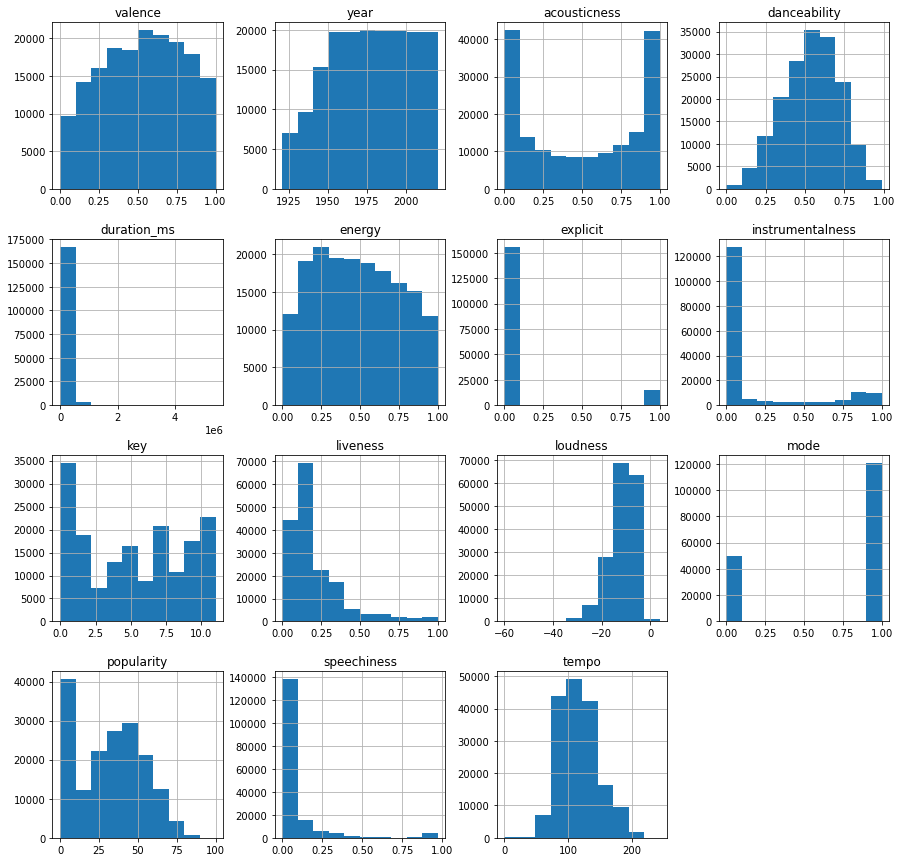

In [6]:
#check each variable's distribution
fig = df.hist(figsize=(15, 15))
plt.title("Distribution of each variables", fontsize=16);

> We firstly look at the distribution of all the variables in the first dataset. However, we will only focus on the following elements as those are the most important from a business perspective.
Year: We can see that Spotify features around the same amount of releases coming out from each decade since the 1950s. Music coming out before that is relatively lacking on the platform.
Danceability: This looks close to a normal distribution.
Energy: This looks close to a right skewed distribution. 
Popularity: There're a lot of songs that have a low popularity score, thus making it more right skewed. However, if we take those out, the graph looks closer to a normal distribution.

The graphs overall look good, we don't need to do extra wrangling.

## Bivariate Exploration

>Let's first look at the relationship between danceability, energy and popularity.

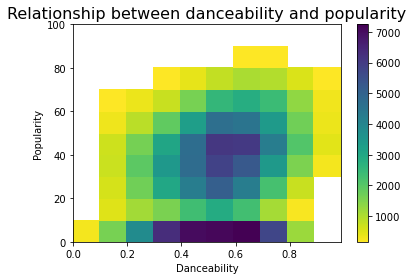

In [9]:
#check each variable's relationship with popularity
plt.hist2d(data = df, x = 'danceability', y = 'popularity', cmin=150, cmap='viridis_r');
plt.colorbar()
plt.title("Relationship between danceability and popularity", fontsize=16)
plt.xlabel('Danceability')
plt.ylabel('Popularity');

We can see that there's a posivie relationship between danceability and popularity, however the relationship is very weak.

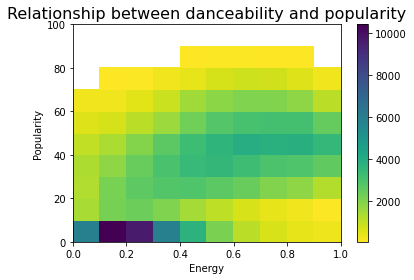

In [10]:
plt.hist2d(data = df, x = 'energy', y = 'popularity', cmin = 50, cmap='viridis_r');
plt.colorbar()
plt.title("Relationship between danceability and popularity", fontsize=16)
plt.xlabel('Energy')
plt.ylabel('Popularity');

Similar to above, there's weak relationship between energy and popularity. This one is even weaker than the previous one.

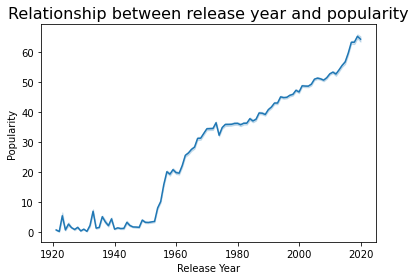

In [21]:
sb.lineplot(x="year", y="popularity", data=df)
plt.title("Relationship between release year and popularity", fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Popularity');

It is very clear that the more recent the releases are, the more popular they are. There is a very strong positive correlation between these two variables.

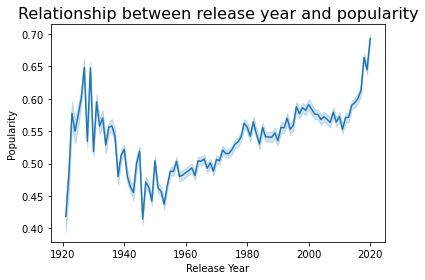

In [22]:
#if songs are becoming more "dance-y"
sb.lineplot(x="year", y="danceability", legend='brief', data=df)
plt.title("Relationship between release year and popularity", fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Popularity');

It shows that music comes out around 1920 - 1930s have relatively high danceability, which makes sense considering the jazz music boom back then. This also shows that in recent years, music has become more "dance-y".

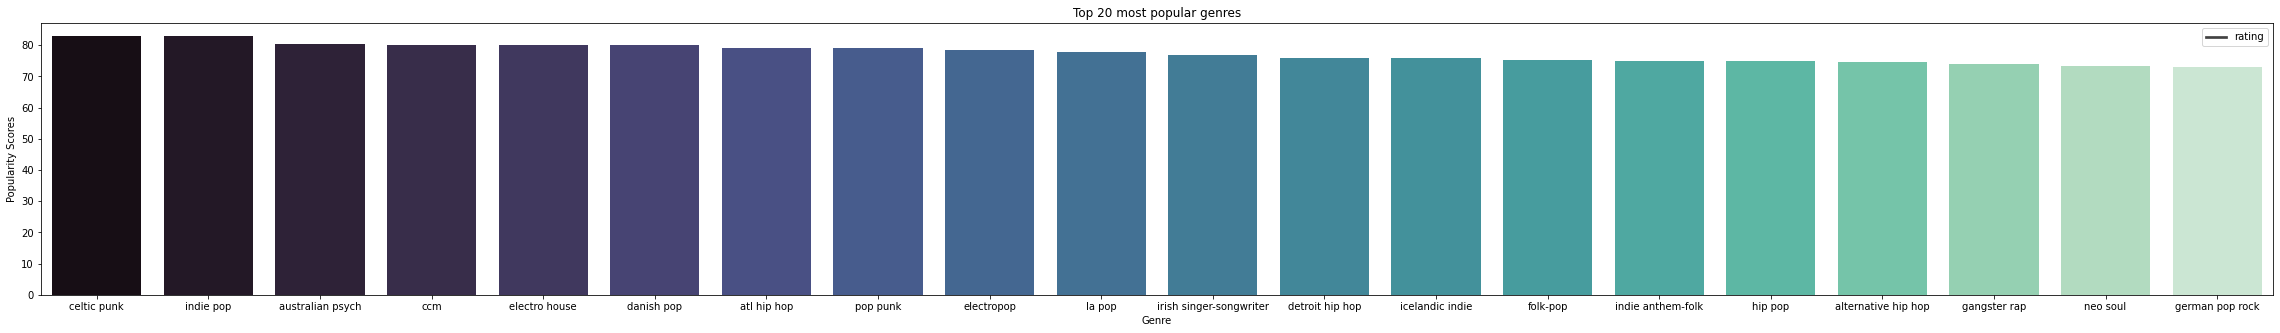

In [14]:
#what genres' music is most popular?
temp = df_genre.groupby('Genre', sort = True)['Popularity'].mean().sort_values(ascending=False)
temp = temp.head(20)
fig, ax = plt.subplots(figsize = (40,5))
ax = sb.barplot(x=temp.index, y=temp.values, palette="mako").set_title("Top 20 most popular genres")
plt.ylabel("Popularity Scores")
plt.legend(labels=["rating"]);

From this graph, we can see that pop music in general is the most popular

## Multivariate Exploration

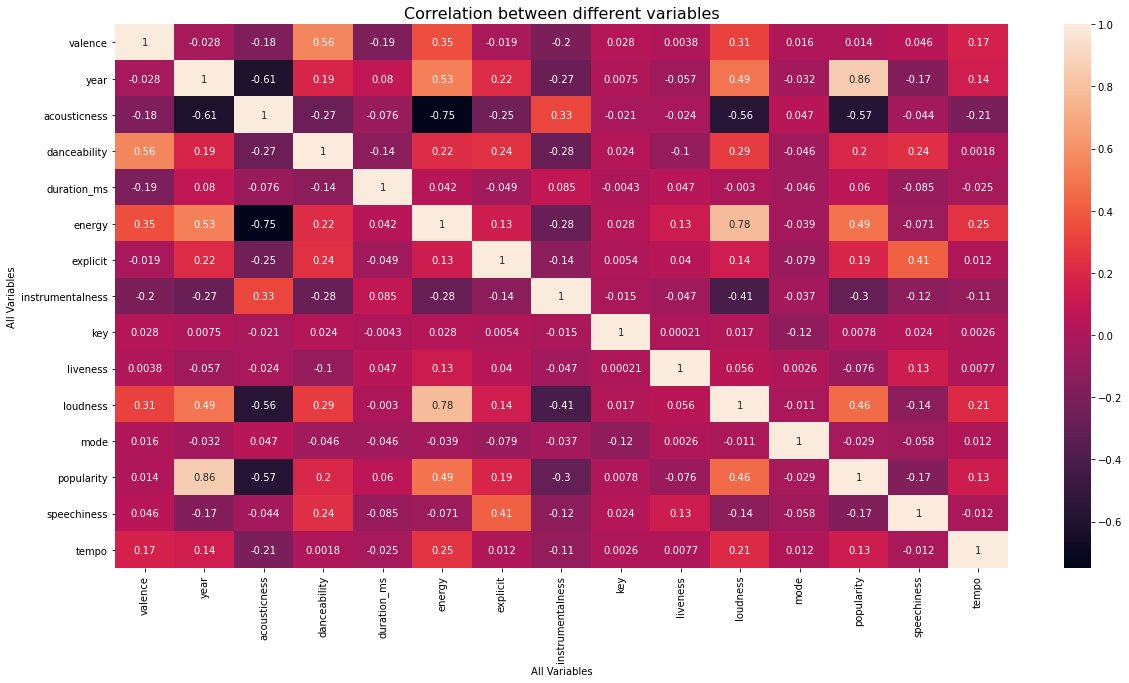

In [18]:
#check correlation between variables
plt.figure(figsize=(20, 10))
sb.heatmap(df.corr(), annot=True)
plt.ylabel("All Variables")
plt.xlabel("All Variables")
plt.title("Correlation between different variables", fontsize=16);

Here we can see that, popularity is influenced by the release date the most, which corresponds to our previous finding. Following, energy and loudness acctually have a lot of influence on the popularity scores too, which is not surprising considering energy and loudness are closely positively correlated too.

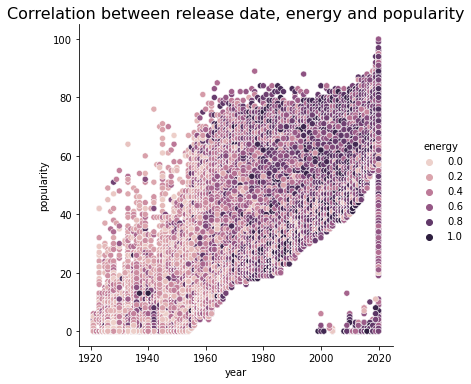

In [16]:
#check relationships between multiple variables related to popularity
g = sb.relplot(
    data=df,
    x="year", y="popularity", hue="energy", sizes=(20, 200))
plt.title("Correlation between release date, energy and popularity", fontsize=16);

This is an interesting finding that besides the more recent songs are more popular, the more recent songs' energy levels are also higher.

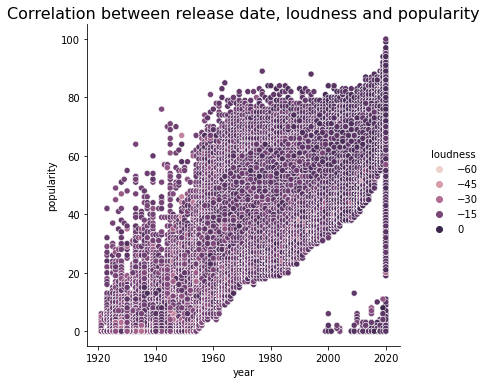

In [17]:
g = sb.relplot(
    data=df,
    x="year", y="popularity", hue="loudness", sizes=(20, 200))
plt.title("Correlation between release date, loudness and popularity", fontsize=16);

However, we didn't find a similar relationship for loudness. Songs didn't become "louder" throughout the years despite the positive correlation between popularity and loudness.

It was surprising to see that loudness would influence the popularity of the release, and danceability not so much.

## Summary

By looking at multiple variable's distributions, and their relationships with populairty score, we found that energy, loudness and release date have the most influence on the music's popularity scores. On top of that, music's energy level and danceability level are increasing on average in the last decades.